In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from TWA_Design_Tools import TWA_Design_Toolkit
from TWA_skrf_Toolkit import TWA_skrf_Toolkit as rftoolkit
import skrf as rf
from scipy.optimize import minimize

strap1: 53.93806173288761 deg
strap2: 151.3054273203227 deg
strap3: 182.05088707836282 deg
strap4: 225.96800393252175 deg
strap5: 249.17419747858867 deg
strap6: 271.6264335487208 deg
strap7: 314.7648784970569 deg
strap8: 345.39941110764323 deg
strap9: 84.21475180027404 deg
deltas [97.36736559 30.74545976 43.91711685 23.20619355 22.45223607 43.13844495
 30.63453261 98.81534069]
[  0.   15.6  31.2  46.8  62.4  78.   93.6 109.2 124.8]


C:\Users\jacob\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


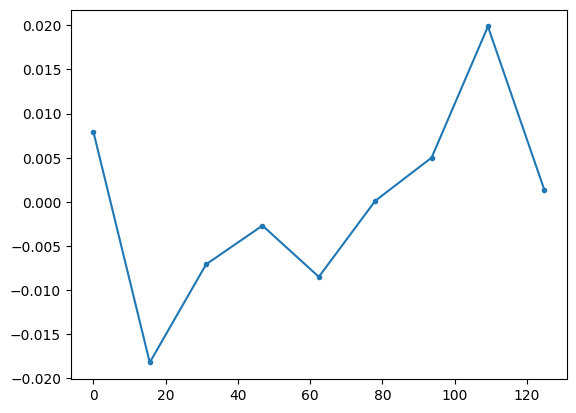

In [2]:
import cmath
import math

def phasor_angle_deg(phasor):
    """
    Calculate the angle of a phasor in degrees.

    Parameters:
    - phasor: A complex number representing the phasor.

    Returns:
    - Angle of the phasor in degrees.
    """
    # Calculate the angle in radians
    angle_rad = cmath.phase(phasor)
    
    # Convert radians to degrees
    angle_deg = math.degrees(angle_rad)
    
    return angle_deg%360


straps_optimized_Js = [0.0079417+0.010906j, -0.018188+0.0099554j, -0.0070726-2.5327E-4j, 
          -0.0026881-0.0027805j, -0.0084935-0.022329j,
          1.1195E-4-0.0039427j, 0.0049993-0.0050405j,
          0.019859-0.0051731j, 0.0013702+0.013524j]

angles = []

for i in range(len(straps_optimized_Js)):
    angles.append(phasor_angle_deg(straps_optimized_Js[i]))
    print(f'strap{i+1}: {angles[i]} deg')

deltas_optimized_Js = np.array(angles[1:]) - np.array(angles[:-1])

print('deltas', deltas_optimized_Js%360)
distarray = np.linspace(0, 8*15.6, 9)
print(distarray)
plt.plot(distarray, straps_optimized_Js, marker='.')

strap1: 49.84164758378336 deg
strap2: 165.01737089702652 deg
strap3: 174.29122247057563 deg
strap4: 186.09330880484933 deg
strap5: 270.46712254905316 deg
strap6: 339.8895870474486 deg
strap7: 351.0671203896423 deg
strap8: 0.7523163240356098 deg
strap9: 124.15416539553453 deg
deltas [115.17572331   9.27385157  11.80208633  84.37381374  69.4224645
  11.17753334   9.68519593 123.40184907]
[  0.   15.6  31.2  46.8  62.4  78.   93.6 109.2 124.8]


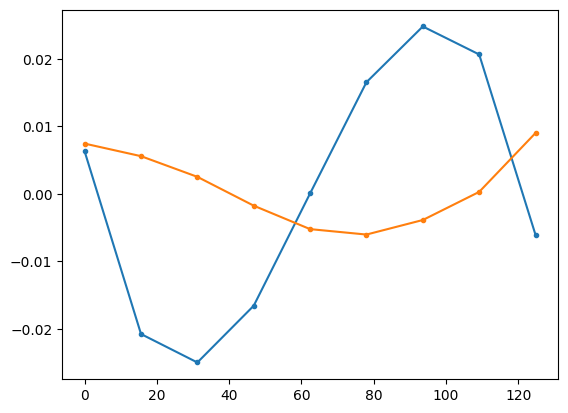

In [3]:
straps_all_same_Cs_95MHz = [0.0062641+0.0074235j, -0.020781+0.0055615j, -0.024996+0.0024988j, -0.016590-0.0017710j, 4.2756E-5-0.0052442j, 0.016519-0.0060485j, 0.024771-0.0038936j, 0.020625+2.7083E-4j, -0.0061035+0.0089965j]
angles = []
mags = np.abs(np.array(straps_all_same_Cs_95MHz))
for i in range(len(straps_all_same_Cs_95MHz)):
    angles.append(phasor_angle_deg(straps_all_same_Cs_95MHz[i]))
    print(f'strap{i+1}: {angles[i]} deg')

deltas_all_same_Cs_95MHz = np.array(angles[1:]) - np.array(angles[:-1])

print('deltas', deltas_all_same_Cs_95MHz%360)
distarray = np.linspace(0, 8*15.6, 9)
print(distarray)
# plt.plot(distarray, straps_all_same_Cs_95MHz, marker='.')
plt.plot(distarray, np.real(straps_all_same_Cs_95MHz), marker='.')
plt.plot(distarray, np.imag(straps_all_same_Cs_95MHz), marker='.')

strap1: 16.27575355476028 deg
strap2: 130.40858787264838 deg
strap3: 140.30050598161057 deg
strap4: 155.16914981576798 deg
strap5: 267.7423547283171 deg
strap6: 308.26830116276386 deg
strap7: 318.56626353487746 deg
strap8: 331.5703533325143 deg
strap9: 114.99005226994203 deg
deltas [114.13283432   9.89191811  14.86864383 112.57320491  40.52594643
  10.29796237  13.0040898  143.41969894]
[  0.   15.6  31.2  46.8  62.4  78.   93.6 109.2 124.8]


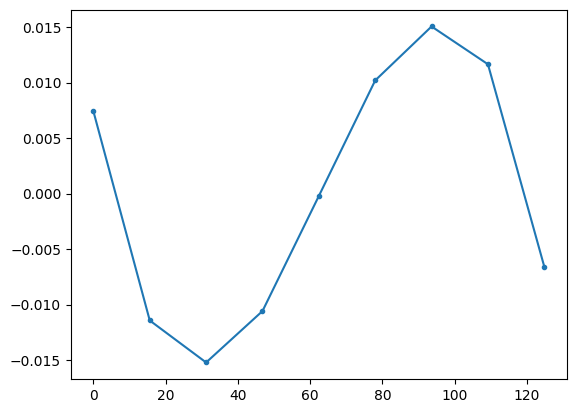

In [4]:
straps_all_same_Cs_96MHz = [0.0074140+0.0021646j, -0.011435+0.013432j, -0.015218+0.012634j, -0.010587+0.0048988j, -2.2002E-4-0.0055809j, 0.010192-0.012920j, 0.015051-0.013285j, 0.011647-0.0063053j, -0.0065920+0.014143j]
angles = []
for i in range(len(straps_all_same_Cs_96MHz)):
    angles.append(phasor_angle_deg(straps_all_same_Cs_96MHz[i]))
    print(f'strap{i+1}: {angles[i]} deg')

deltas_all_same_Cs_96MHz = np.array(angles[1:]) - np.array(angles[:-1])

print('deltas', deltas_all_same_Cs_96MHz%360)
distarray = np.linspace(0, 8*15.6, 9)
print(distarray)
plt.plot(distarray, straps_all_same_Cs_96MHz, marker='.')

strap1: 90.44142190117645 deg
strap2: 164.00626647382026 deg
strap3: 237.49356656670312 deg
strap4: 310.9906818157736 deg
strap5: 24.497195575877424 deg
strap6: 97.99686356146748 deg
strap7: 171.55468945609354 deg
deltas [73.56484457 73.48730009 73.49711525 73.50651376 73.49966799 73.55782589]
[  0.   15.6  31.2  46.8  62.4  78.   93.6 109.2 124.8]


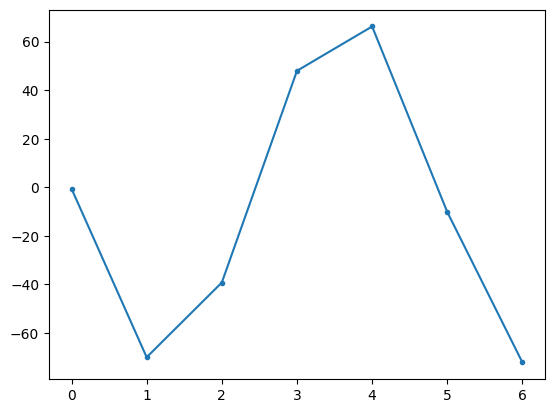

In [5]:
# grant antenna c
straps_grant = [-0.56327+73.110j, -69.962+20.053j, -39.201-61.518j, 47.968-55.199j, 66.215+30.172j, -10.161+72.328j, -72.113+10.707j]
angles = []
for i in range(len(straps_grant)):
    angles.append(phasor_angle_deg(straps_grant[i]))
    print(f'strap{i+1}: {angles[i]} deg')

deltas_grant = np.array(angles[1:]) - np.array(angles[:-1])

print('deltas', deltas_grant%360)
distarray = np.linspace(0, 8*15.6, 9)
print(distarray)
plt.plot(straps_grant, marker='.')

In [6]:
npar = 5
deltaphi = np.pi/2
clight = 3e8
f = 96e6
w = np.pi*2*f

kpar = npar * w/clight
print(kpar)
d = deltaphi / kpar
print(d)



10.053096491487338
0.15625


In [7]:
# Enter the physical parameters of the antenna 
num_straps = 9
f0 = 96e6
w0 = 2*np.pi*f0
clight = 3e8
Rant = 1.12 # m, hfs of d3d

# See code logbook "my antenna" section. This is for shot 147634. 
n_par = -5 
k_par = w0*n_par/clight
print(f'k_par : {k_par} 1/m')
n_phi = Rant*k_par
print(f'n_phi: {n_phi}')

# settings to create the rf toolkit object 
capz0 = 9.3506
antz0 = 30
freqs_for_fullant = np.arange(81,112, 1)#  np.array([96, 97]) # MHz
capfile = 'circ_model/S11_cap_81to111MHz.csv'
antfile = 'circ_model/fixed_bigscan_full.csv' #'circ_model/fixed_Smat_ant_96_and_97_deembed.csv'

myrfTWA = rftoolkit(num_straps=num_straps, f0=f0, k_par_max=k_par, capz0=capz0, 
                    antz0=antz0, freqs_for_fullant=freqs_for_fullant, capfile=capfile, antfile=antfile)

# add items to geometry
ar = 1.5e-2
d = 11e-2
s0 = 16e-2
wstrap = 8e-2
l = 15e-2
ts = 0.5e-2
tbox = 1e-2
h = .5e-2
t_cap_extend = 0.25e-2
wcap = wstrap + 2*t_cap_extend # 1 cm on either side
wcapbox = wcap + 2*h
tdiv = myrfTWA.geometry_dict['s_rez'] - 2*h - wcap 
dcap = ts + 2*t_cap_extend
dcapbox = dcap + 2*h
lcapbox = 10e-2
lcut = 6e-2
ldeembed = 5e-2
lfeed = 10e-2

myrfTWA.add_to_geometry('ar', ar)
myrfTWA.add_to_geometry('d', d)
myrfTWA.add_to_geometry('s0', s0)
myrfTWA.add_to_geometry('wstrap', wstrap)
myrfTWA.add_to_geometry('l', l)
myrfTWA.add_to_geometry('ts', ts)
myrfTWA.add_to_geometry('tbox', tbox)
myrfTWA.add_to_geometry('h', h)
myrfTWA.add_to_geometry('t_cap_extended', t_cap_extend)
myrfTWA.add_to_geometry('wcap', wcap)
myrfTWA.add_to_geometry('wcapbox', wcapbox)
myrfTWA.add_to_geometry('tdiv', tdiv)
myrfTWA.add_to_geometry('dcap', dcap)
myrfTWA.add_to_geometry('dcapbox', dcapbox)
myrfTWA.add_to_geometry('lcapbox', lcapbox)
myrfTWA.add_to_geometry('lcut', lcut)
myrfTWA.add_to_geometry('ldeembed', ldeembed)
myrfTWA.add_to_geometry('lfeed', lfeed)

myrfTWA.print_geometry()

k_par : -10.053096491487338 1/m
n_phi: -11.25946807046582


c:\Users\jacob\anaconda3\envs\waves\Lib\site-packages\scipy\interpolate\_fitpack_impl.py:975: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
	kx,ky=3,3 nx,ny=35,81 m=2356 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


num_straps:     9
s_rez:          0.15625
lamda0:         3.1228381041666666
ar:             0.015
d:              0.11
s0:             0.16
wstrap:         0.08
l:              0.15
ts:             0.005
tbox:           0.01
h:              0.005
t_cap_extended: 0.0025
wcap:           0.085
wcapbox:        0.095
tdiv:           0.061249999999999985
dcap:           0.01
dcapbox:        0.02
lcapbox:        0.1
lcut:           0.06
ldeembed:       0.05
lfeed:          0.1


c:\Users\jacob\anaconda3\envs\waves\Lib\site-packages\scipy\interpolate\_fitpack_impl.py:975: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
	kx,ky=3,3 nx,ny=34,81 m=2356 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


In [8]:
# test the cap models
capnet_test = myrfTWA.build_capnet_given_length(length=0.021,freqs=np.array([96,97]) ,filename=myrfTWA.capfile)
print(capnet_test.name)
Zcap, C = myrfTWA.print_znorm_and_capacitance(capnet_test, f=96, toprint=True)
Zcap, C = myrfTWA.print_znorm_and_capacitance(capnet_test, f=97, toprint=True)



l = 0.021
Zcap:(-0.0012613639774426047-289.5822924033037j), z0: [9.3506+0.j], Zcap/z0: [-0.0001349-30.96938083j]
C = 5.725018531974515 pF
Zcap:(-0.0012185696232601662-286.59623629126725j), z0: [9.3506+0.j], Zcap/z0: [-0.00013032-30.65003703j]
C = 5.725031948874873 pF


In [9]:
# test the antennas 

s1 = myrfTWA.get_ant_Smat_given_f(myrfTWA.antfile, f=97)
antnet_test = myrfTWA.build_antnet_chopped(freqs=np.array([96,97]), filename=myrfTWA.antfile)



In [10]:
# test full network given length
l = 0.03 
full_net_l = myrfTWA.get_fullant_given_one_length(l)
print(full_net_l.s)
myrfTWA.get_fullant_S11_S12_given_one_length(length=l, f=97)

[[[ 7.37333612e-01+0.67659949j  8.11215029e-04-0.000887j  ]
  [ 8.05916879e-04-0.00088671j  7.37541761e-01+0.6766309j ]]

 [[ 7.54010145e-01+0.65799035j  8.58605815e-04-0.00098591j]
  [ 8.53049919e-04-0.0009855j   7.54209660e-01+0.65802248j]]

 [[ 7.70240881e-01+0.63894329j  9.09985605e-04-0.00109775j]
  [ 9.04140033e-04-0.00109719j  7.70431751e-01+0.638977j  ]]

 [[ 7.86022633e-01+0.61945713j  9.65786561e-04-0.00122463j]
  [ 9.59614859e-04-0.00122392j  7.86204866e-01+0.61949332j]]

 [[ 8.01265152e-01+0.59685917j  1.02404996e-03-0.00137397j]
  [ 1.02401810e-03-0.00136589j  8.01525706e-01+0.5995687j ]]

 [[ 8.15994546e-01+0.57664468j  1.08982918e-03-0.0015391j ]
  [ 1.08991322e-03-0.00153021j  8.16390751e-01+0.57919864j]]

 [[ 8.30272161e-01+0.55598149j  1.16164172e-03-0.00172863j]
  [ 1.16176797e-03-0.00171907j  8.30796246e-01+0.55837663j]]

 [[ 8.44097898e-01+0.53485911j  1.24017045e-03-0.00194712j]
  [ 1.24048073e-03-0.00193655j  8.44738096e-01+0.53709379j]]

 [[ 8.57465046e-01+0.513

((0.9469411559156693+0.32094080376741985j),
 (0.0024025017500804422-0.006822096101518424j))

In [11]:
# now, try building the full network form a given capacitance 

C = 5.365672663526817e-12 # F
full_net_C = myrfTWA.get_fullant_given_C_via_caps(C)
print(full_net_C.s)
myrfTWA.get_fullant_S11_S12_given_C(C=C, f=96)

[[[6.94413749e-01+7.20357309e-01j 4.44447125e-04-4.31588233e-04j]
  [4.41533242e-04-4.31456202e-04j 6.94591511e-01+7.20422170e-01j]]

 [[7.10416441e-01+7.04592210e-01j 4.60031101e-04-4.66742514e-04j]
  [4.57053314e-04-4.66552196e-04j 7.10587479e-01+7.04658361e-01j]]

 [[7.26009648e-01+6.88526603e-01j 4.76398905e-04-5.04949280e-04j]
  [4.73349422e-04-5.04698753e-04j 7.26174073e-01+6.88594701e-01j]]

 [[7.41193152e-01+6.72167678e-01j 4.93602708e-04-5.46548854e-04j]
  [4.90473071e-04-5.46235670e-04j 7.41351094e-01+6.72238385e-01j]]

 [[7.56079791e-01+6.53260760e-01j 5.10913617e-04-5.94078373e-04j]
  [5.10960042e-04-5.89967467e-04j 7.56118425e-01+6.55596088e-01j]]

 [[7.70316540e-01+6.36469006e-01j 5.29840081e-04-6.43610162e-04j]
  [5.29938646e-04-6.39231272e-04j 7.70475998e-01+6.38673948e-01j]]

 [[7.84150356e-01+6.19404717e-01j 5.49776491e-04-6.97852648e-04j]
  [5.49864915e-04-6.93342956e-04j 7.84423786e-01+6.21477551e-01j]]

 [[7.97584418e-01+6.02071559e-01j 5.70787742e-04-7.57378627e-0

((0.8904828887847847+0.45416640127574365j),
 (0.000788194776836336-0.0015219755190410895j))

In [12]:
# get data from fully built comsol antenna with caps:
import csv
def get_ant_S_11_21(filename):
    data = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            data.append(row)
    headers = data[4]
    data = data[5:]
    fmat_string  = []
    for row in data:
        fmat_string.append(row)
    fmat = np.array([[complex(num.replace('i', 'j')) for num in row] for row in fmat_string], dtype=complex)
    lcaps = fmat[:,0]
    S11_mag = np.abs(fmat[:,3])
    S21_mag = np.abs(fmat[:,4])
    return np.real(lcaps), S11_mag, S21_mag

filename2 = 'circ_model/S11_S12_96mhz_lcap_3by0_01_to_9_cm.csv'
lcaps, S11_mag_data, S21_mag_data = get_ant_S_11_21(filename2)

In [13]:
# # okay, things look like they are working!! 
# ls = np.arange(0.02, 0.096, 0.001)
# S11v, S21v, axs = myrfTWA.plot_abs_S11_S21_l_scan(ls, f=96, return_data=True)
# axs[0].plot(lcaps*100, S11_mag_data, marker='.', color='darkblue', linestyle='--', label='from pure COMSOL')
# axs[1].plot(lcaps*100, S21_mag_data, marker='.', color='darkred', linestyle='--', label='from pure COMSOL')
# axs[0].legend()
# axs[1].legend()



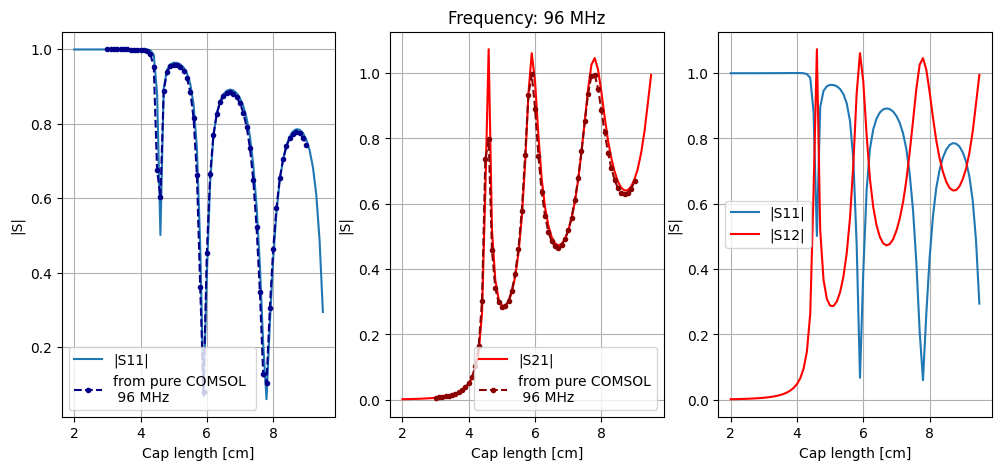

In [14]:
# okay, things look like they are working!! 
ls = np.arange(0.02, 0.096, 0.001)
S11v, S21v, axs = myrfTWA.plot_abs_S11_S21_l_scan_from_internal_datatable(ls, f=96, return_data=True)
axs[0].plot(lcaps*100, S11_mag_data, marker='.', color='darkblue', linestyle='--', label='from pure COMSOL \n 96 MHz')
axs[1].plot(lcaps*100, S21_mag_data, marker='.', color='darkred', linestyle='--', label='from pure COMSOL\n 96 MHz')
axs[0].legend()
axs[1].legend()

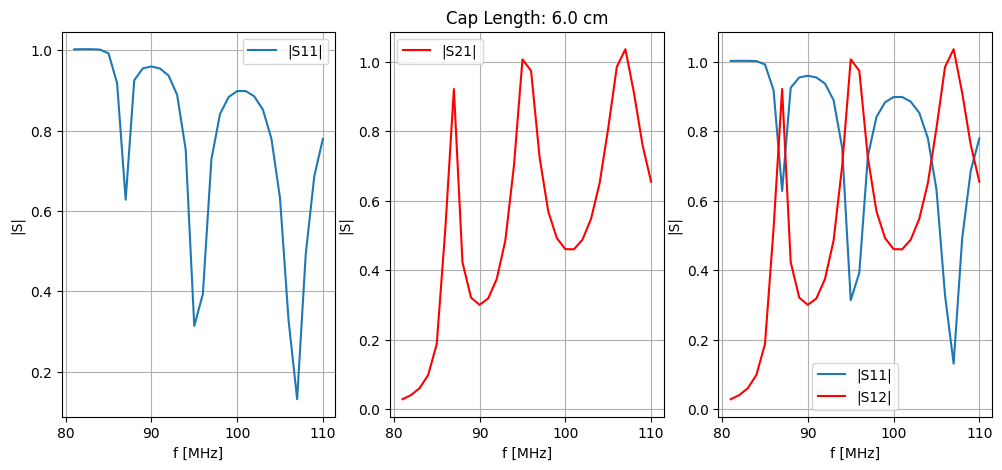

In [15]:
# now, can begin testing optimization algorithm. 
fs = np.arange(81, 111, 1)
l = 0.06
S11v, S21v, axs = myrfTWA.plot_abs_S11_S21_f_scan_from_internal_datatable(fs, l, return_data=True)


In [16]:
# now work on interpolation functions 
from scipy.interpolate import interp2d
capdata = myrfTWA.captable
round_level = 3
fs = np.real(np.unique(capdata[:,0]))
ls = np.round(np.real(np.unique(capdata[:,1])), round_level)
S11_real = np.real(capdata[:,5]).reshape(fs.shape[0], ls.shape[0]) # this is the de-embeded collumn 
S11_imag = np.imag(capdata[:,5]).reshape(fs.shape[0], ls.shape[0]) # this is the de-embeded collumn 

fsmesh, lsmesh = np.meshgrid(fs, ls, indexing='ij')
# print(fsmesh.shape, S11_imag.shape)
# i = -1
# j = -2
# print(f'f:{fsmesh[i,j]}')
# print(f'l: {lsmesh[i,j]}')
# print(f'S11: {S11_real[i,j]} + {S11_imag[i,j]}j')
S11_real_interpolator = interp2d(fsmesh, lsmesh, S11_real)
S11_imag_interpolator = interp2d(fsmesh, lsmesh, S11_imag)


C:\Users\jacob\AppData\Local\Temp\ipykernel_22804\3637424113.py:17: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  S11_real_interpolator = interp2d(fsmesh, lsmesh, S11_real)
c:\Users\jacob\anaconda3\envs\waves\Lib\site-packages\scipy\interpolate\_fitpack_impl.py:975: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=33,79 m=2356 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWar

In [17]:
myrfTWA.interpolate_cap_data(f=81, l=0.0205)

(0.9986079216592236-0.05274141324390507j)

In [18]:
from scipy.interpolate import interp1d
num_ports = 11
fs = np.arange(81,112,1)
s = myrfTWA.build_antnet_chopped_from_internal_datatable(fs, name=None).s
interp_matrix_real = []
interp_matrix_imag = []


for i in range(num_ports):
    interp_row_list_real = []
    interp_row_list_imag = []
    for j in range(num_ports):
        interp_row_list_real.append(interp1d(fs, np.real(s[:,i,j]))) # interpolate the real part 
        interp_row_list_imag.append(interp1d(fs, np.imag(s[:,i,j]))) # interpolate the imag part

    interp_matrix_real.append(interp_row_list_real)
    interp_matrix_imag.append(interp_row_list_imag)

print(len(interp_matrix_imag[10])) 

print(interp_matrix_real[10][1](83.5)) # looking good!





11
0.4673092798883052


In [19]:
# now using the new function which uses this 

freq = 83.5

Smat = myrfTWA.interpolate_sant_for_any_f(freq)

print(Smat[10, :])



[-9.57392957e-07-9.03245496e-07j  4.67313368e-01-2.87157838e-01j
  6.00678610e-08-4.11650619e-06j -4.04958977e-07-1.28070225e-05j
 -1.23842038e-06-3.81376257e-05j -6.27882419e-06-1.16706032e-04j
 -5.17538545e-05-3.82052345e-04j -4.64278859e-04-1.58901716e-03j
 -2.15355838e-03-1.13185936e-02j  5.24686076e-02-1.00870516e-01j
  7.01532100e-01+4.41783939e-01j]


In [20]:
# now working on the minimization 
prms = []
errors = []
def info(i_iter, p):
    """
    Print information during the fitting procedure
    """
    print("-" * 40)
    print(f"i_iter = {i_iter}")
    print("New simulation.")
    print(f"Point is: {p}")

freq_bounds_for_optimization = (93, 98)#(93, 98) # the bounds on frequency for the optimization 
S11_db_cutouff = -35 # the value of the cutoff of the optimization reflection in dB

def error_function(prm):
    global i_iter
    global prms
    global errors
    prms.append(prm)
    i_iter += 1
    info(i_iter, prm)
    # Filter the results if a negative value is found
    if any([e < 0 for e in prm]):
        return 1e30
    
    network = myrfTWA.get_fullant_given_lengths_from_internal_datatable(lengths=prm, symetric_mode=True) #TODO: make true

    S11_array = np.zeros_like(myrfTWA.freqs_for_fullant, dtype='complex')

    for i in range(S11_array.shape[0]):
        S11, S21 = myrfTWA.get_full_TWA_network_S11_S21(fullnet=network, f=myrfTWA.freqs_for_fullant[i])
        S11_array[i] = S11


    err = 0

    for i in range(S11_array.shape[0]):
        
        S11_mag = np.abs(S11_array[i])
        S11_db = 20*np.log10(S11_mag)
        # only contribute to error if we are between the desired frequency range 
        if myrfTWA.freqs_for_fullant[i] >= freq_bounds_for_optimization[0] and myrfTWA.freqs_for_fullant[i] <=freq_bounds_for_optimization[1]:
        
            if S11_db <= S11_db_cutouff: 
                err = err + 0
            else:
                err = err + (S11_db - S11_db_cutouff)**2 # squared error if the value of S11 is above -30 
    
    print(f"Average absolute error is : {err:.2e}")
    errors.append(err)
    return err



    


    
    

In [21]:
# now time to attempt the minimization 

i_iter = 0

xatol = 1e-4
fatol = 1e-4

#initial_guess = [0.04]*5
#bounds = [(0.02, 0.095)]*5

initial_guess = [0.04]*5
bounds = [(0.02, 0.095)]*5
res = minimize(error_function,
               initial_guess,
               bounds=bounds,
               method="Nelder-Mead",
               options={"disp": True, "xatol": xatol, "fatol":fatol})
# res = minimize(error_function,
#                initial_guess,
#                bounds=bounds,
#                method="Nelder-Mead",
#                options={"disp": True})


----------------------------------------
i_iter = 1
New simulation.
Point is: [0.04 0.04 0.04 0.04 0.04]
[0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]
Average absolute error is : 7.35e+03
----------------------------------------
i_iter = 2
New simulation.
Point is: [0.042 0.04  0.04  0.04  0.04 ]
[0.042, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.042]
Average absolute error is : 7.35e+03
----------------------------------------
i_iter = 3
New simulation.
Point is: [0.04  0.042 0.04  0.04  0.04 ]
[0.04, 0.042, 0.04, 0.04, 0.04, 0.04, 0.04, 0.042, 0.04]
Average absolute error is : 7.35e+03
----------------------------------------
i_iter = 4
New simulation.
Point is: [0.04  0.04  0.042 0.04  0.04 ]
[0.04, 0.04, 0.042, 0.04, 0.04, 0.04, 0.042, 0.04, 0.04]
Average absolute error is : 7.35e+03
----------------------------------------
i_iter = 5
New simulation.
Point is: [0.04  0.04  0.04  0.042 0.04 ]
[0.04, 0.04, 0.04, 0.042, 0.04, 0.042, 0.04, 0.04, 0.04]
Average absolute error i

C:\Users\jacob\AppData\Local\Temp\ipykernel_22804\2438212521.py:13: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  res = minimize(error_function,


In [22]:
# confirm class version works 
initial_guess = [0.04]*5
bounds = [(0.02, 0.095)]*5#[(0.02, 0.095)]*5
freq_bounds = (93, 98)
s11cutoff = -35
method = "Nelder-Mead"
xatol = 1e-4
fatol = 1e-4
maxiter = 2000
options = {"disp": True, "xatol": xatol, "fatol":fatol, "maxiter":maxiter}

res = myrfTWA.run_optimization(initial_guess=initial_guess, 
                         length_bounds=bounds,
                         S11_db_cutouff=s11cutoff,
                         freq_bounds=freq_bounds, 
                         method=method,
                         options=options,
                         symetric_mode=True,
                         one_cap_type_mode=False)



----------------------------------------
i_iter = 1
New simulation.
Point is: [0.04 0.04 0.04 0.04 0.04]
[0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]
Average absolute error is : 7.35e+03
----------------------------------------
i_iter = 2
New simulation.
Point is: [0.042 0.04  0.04  0.04  0.04 ]
[0.042, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.042]
Average absolute error is : 7.35e+03
----------------------------------------
i_iter = 3
New simulation.
Point is: [0.04  0.042 0.04  0.04  0.04 ]
[0.04, 0.042, 0.04, 0.04, 0.04, 0.04, 0.04, 0.042, 0.04]
Average absolute error is : 7.35e+03
----------------------------------------
i_iter = 4
New simulation.
Point is: [0.04  0.04  0.042 0.04  0.04 ]
[0.04, 0.04, 0.042, 0.04, 0.04, 0.04, 0.042, 0.04, 0.04]
Average absolute error is : 7.35e+03
----------------------------------------
i_iter = 5
New simulation.
Point is: [0.04  0.04  0.04  0.042 0.04 ]
[0.04, 0.04, 0.04, 0.042, 0.04, 0.042, 0.04, 0.04, 0.04]
Average absolute error i

final lengths: [0.09466963783505287, 0.07421574051428928, 0.046196891378728115, 0.035031073746570024, 0.07014546233164104]
[0.09466963783505287, 0.07421574051428928, 0.046196891378728115, 0.035031073746570024, 0.07014546233164104, 0.035031073746570024, 0.046196891378728115, 0.07421574051428928, 0.09466963783505287]


C:\Users\jacob\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


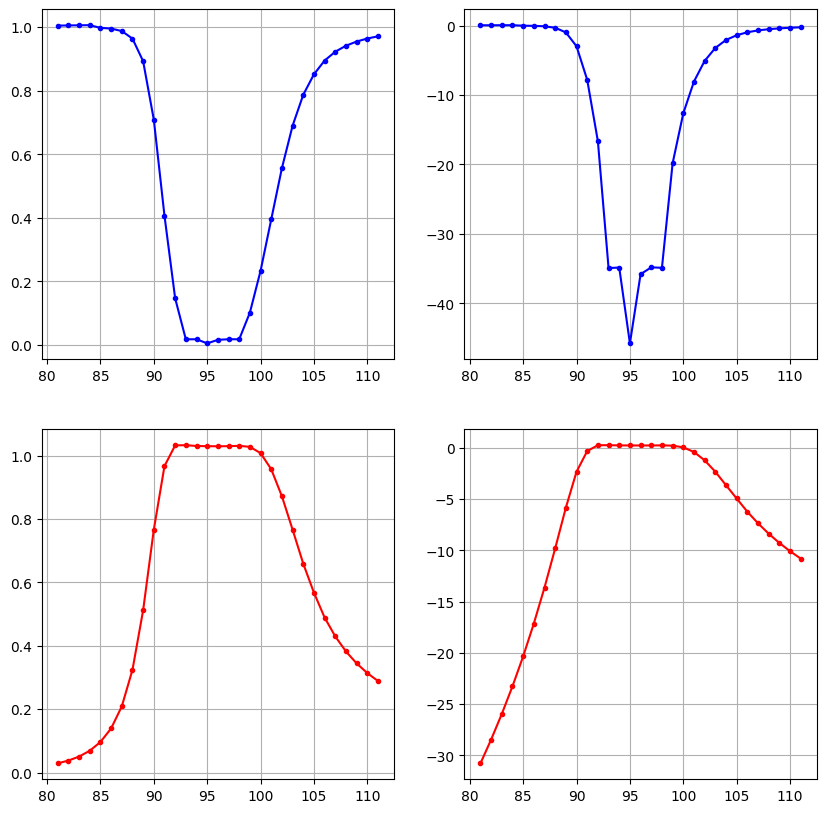

In [23]:
lengths_found = res.x.tolist()
print('final lengths:',lengths_found)
full_net_optimized = myrfTWA.get_fullant_given_lengths_from_internal_datatable(lengths_found, symetric_mode=True) #TODO: make true

S11_array = np.zeros_like(myrfTWA.freqs_for_fullant, dtype='complex')
S21_array = np.zeros_like(myrfTWA.freqs_for_fullant, dtype='complex')

for i in range(S11_array.shape[0]):
    S11, S21 = myrfTWA.get_full_TWA_network_S11_S21(fullnet=full_net_optimized, f=myrfTWA.freqs_for_fullant[i])
    S11_array[i] = S11
    S21_array[i] = S21

S11_mag_array = np.zeros_like(S11_array)
S11_db_array = np.zeros_like(S11_array)

S21_mag_array = np.zeros_like(S11_array)
S21_db_array = np.zeros_like(S11_array)


for i in range(S11_array.shape[0]):
    S11_mag_array[i] = np.abs(S11_array[i])
    S11_db_array[i] = 20*np.log10(S11_mag_array[i])
    S21_mag_array[i] = np.abs(S21_array[i])
    S21_db_array[i] = 20*np.log10(S21_mag_array[i])

fig, ax = plt.subplots(2,2,figsize=(10,10))

ax[0,0].plot(myrfTWA.freqs_for_fullant, S11_mag_array, marker='.', color='blue')
ax[0,1].plot(myrfTWA.freqs_for_fullant, S11_db_array, marker='.', color='blue')
ax[0,0].grid()
ax[0,1].grid()
ax[1,0].plot(myrfTWA.freqs_for_fullant, S21_mag_array, marker='.', color='red')
ax[1,1].plot(myrfTWA.freqs_for_fullant, S21_db_array, marker='.', color='red')
ax[1,0].grid()
ax[1,1].grid()


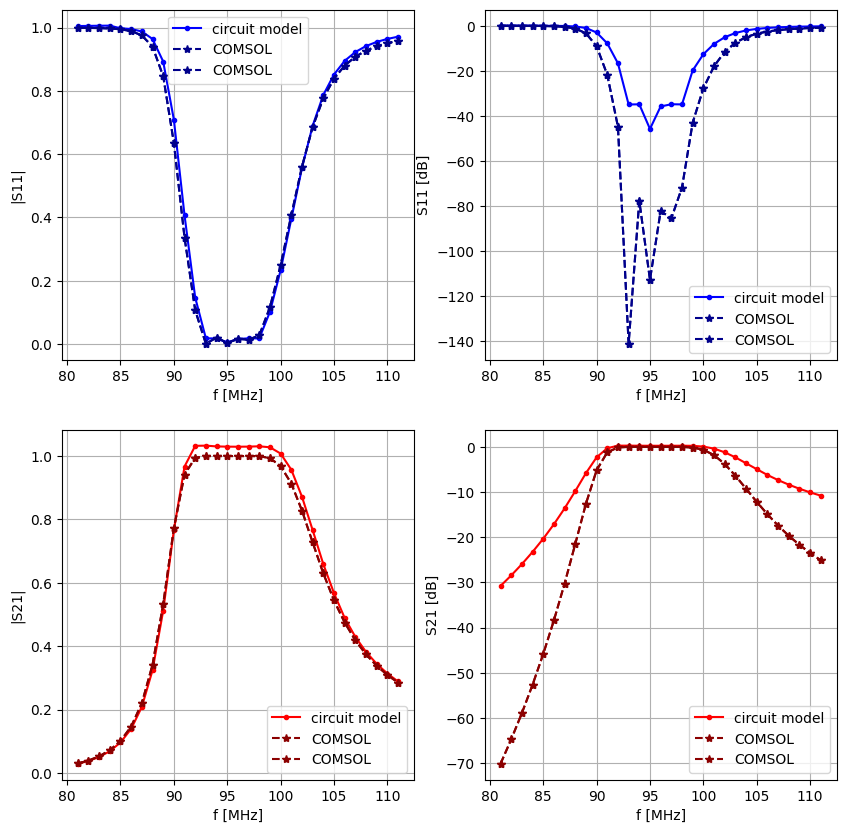

In [24]:
# load up full comsol model's scan 
filename = 'circ_model/S11_S21_fullnet_optimized1.csv'
#filename = 'circ_model/fscan_10_25_fullant.csv'
dataset, headers = myrfTWA.get_comsol_datatable(filename)
fd = dataset[:, 0]
S11d = dataset[:,1]
S21d = dataset[:,2]

S11d_mag = np.abs(S11d)
S21d_mag = np.abs(S21d)

S11d_db = 20*np.log(S11d_mag)
S21d_db = 20*np.log(S21d_mag)


fig, ax = plt.subplots(2,2,figsize=(10,10))

# plot optimization circuit
ax[0,0].plot(myrfTWA.freqs_for_fullant, S11_mag_array, marker='.', color='blue', label='circuit model')
ax[0,1].plot(myrfTWA.freqs_for_fullant, S11_db_array, marker='.', color='blue', label='circuit model')
ax[0,0].grid()
ax[0,1].grid()
ax[1,0].plot(myrfTWA.freqs_for_fullant, S21_mag_array, marker='.', color='red', label='circuit model')
ax[1,1].plot(myrfTWA.freqs_for_fullant, S21_db_array, marker='.', color='red', label='circuit model')
ax[1,0].grid()
ax[1,1].grid()

# plot data

ax[0,0].plot(myrfTWA.freqs_for_fullant, S11d_mag, marker='*', color='darkblue', label='COMSOL',linestyle='--')
ax[0,1].plot(myrfTWA.freqs_for_fullant, S11d_db, marker='*', color='darkblue', label='COMSOL',linestyle='--')
ax[1,0].plot(myrfTWA.freqs_for_fullant, S21d_mag, marker='*', color='darkred', label='COMSOL',linestyle='--')
ax[1,1].plot(myrfTWA.freqs_for_fullant, S21d_db, marker='*', color='darkred', label='COMSOL',linestyle='--')
ax[0,0].plot(fd, S11d_mag, marker='*', color='darkblue', label='COMSOL',linestyle='--')
ax[0,1].plot(fd, S11d_db, marker='*', color='darkblue', label='COMSOL',linestyle='--')
ax[1,0].plot(fd, S21d_mag, marker='*', color='darkred', label='COMSOL',linestyle='--')
ax[1,1].plot(fd, S21d_db, marker='*', color='darkred', label='COMSOL',linestyle='--')

ax[0,0].set_xlabel('f [MHz]')
ax[0,1].set_xlabel('f [MHz]')
ax[1,0].set_xlabel('f [MHz]')
ax[1,1].set_xlabel('f [MHz]')

ax[0,0].set_ylabel('|S11|')
ax[0,1].set_ylabel('S11 [dB]')
ax[1,0].set_ylabel('|S21|')
ax[1,1].set_ylabel('S21 [dB]')

ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()


In [25]:
freq_bounds_for_optimization = (92, 99)
freqs = myrfTWA.freqs_for_fullant
i_f_lower = np.where(freqs == freq_bounds_for_optimization[0])
print(freqs[i_f_lower])

for i in range(freqs.shape[0]):
    if freqs[i] >= freq_bounds_for_optimization[0] and freqs[i] <=freq_bounds_for_optimization[1]:
        print(freqs[i])

[92]
92
93
94
95
96
97
98
99


In [26]:
if type([2,3,4]) == list:
    print('gogog')
l = np.array([1,2,3])
print(l)
m = l.tolist()
print(m)
m.append(4)
print(m)

gogog
[1 2 3]
[1, 2, 3]
[1, 2, 3, 4]


(0.9975548731858-0.06989977398319488j)
(1000,)


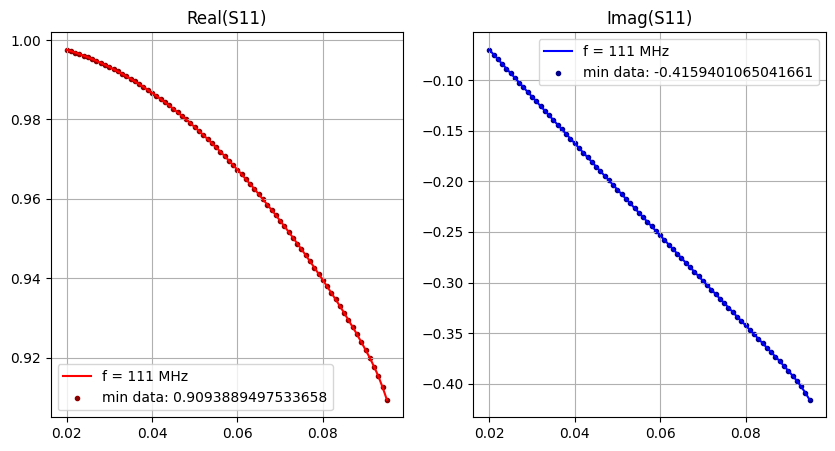

In [27]:
# plot the capacitor
lengths = np.linspace(0.02, 0.095, 1000)
S11_array = np.zeros_like(lengths, dtype='complex')
f = 111

for i in range(lengths.shape[0]):
    l = lengths[i]
    capnet = myrfTWA.build_capnet_given_length_interpolated(length=l, freqs=myrfTWA.freqs_for_fullant)
    i_f = np.where(myrfTWA.freqs_for_fullant == f)
    S11 = capnet.s[i_f][0][0][0]
    S11_array[i] = S11
    if i ==0:
        print(S11)
print(S11_array.shape)
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].plot(lengths, np.real(S11_array), label=f'f = {f} MHz', color='red')
ax[1].plot(lengths, np.imag(S11_array), label=f'f = {f} MHz', color='blue')


ax[0].grid()
ax[1].grid()

ax[0].set_title('Real(S11)')
ax[1].set_title('Imag(S11)')


# raw data 
file_name = 'circ_model/S11_cap_81to111MHz.csv'
length_data = np.arange(0.02, 0.0951, 0.001)
S11_found = np.zeros_like(length_data, dtype='complex')
for i in range(length_data.shape[0]):
    ffound, lcapfound, S11, S11db, Z0_port, VSWR = myrfTWA.get_cap_S_given_f_and_lcap(filename=file_name,
                                                                                       f=f, lcap=length_data[i], round_level=3)
    S11_found[i] = S11

ax[0].scatter(length_data, np.real(S11_found), marker='.', color='darkred', label=f'min data: {np.min(np.real(S11_found))}')
ax[1].scatter(length_data, np.imag(S11_found), marker='.', color='darkblue', label=f'min data: {np.min(np.imag(S11_found))}')
ax[0].legend()
ax[1].legend()



In [28]:
g = [1 ,2 ,3]
gg = g.copy()
k = g.copy()
k.reverse()
for i in range(len(k)):
    g.append(k[i])

for i in range(1,len(k)):
    gg.append(k[i])

print(gg, '\n', g)


[1, 2, 3, 2, 1] 
 [1, 2, 3, 3, 2, 1]


In [29]:
lengths = [.02, .03, .04, .05, .06]
#myrfTWA.build_capnet_given_length_interpolated(length=0.02, freqs=myrfTWA.freqs_for_fullant)
myrfTWA.get_fullant_given_lengths_from_internal_datatable(lengths, symetric_mode=True)

[0.02, 0.03, 0.04, 0.05, 0.06, 0.05, 0.04, 0.03, 0.02]


2-Port Network: '',  81.0-111.0 MHz, 31 pts, z0=[30.+0.j 30.+0.j]

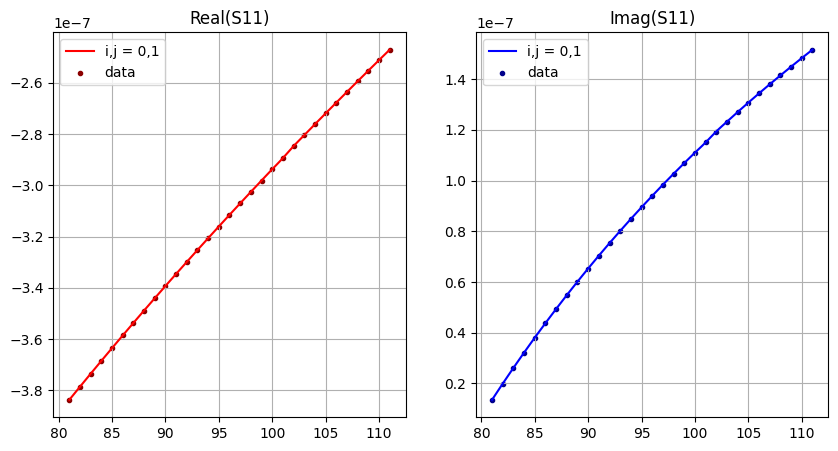

In [30]:
# check the behavior of the antenna s matrix interpolation 
# plot the capacitor
fs = np.linspace(81, 111, 100)
i = 0
j = 1

Sij_array = myrfTWA.interp_matrix_real[i][j](fs) + 1j*myrfTWA.interp_matrix_imag[i][j](fs)

fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].plot(fs, np.real(Sij_array), label=f'i,j = {i},{j}', color='red')
ax[1].plot(fs, np.imag(Sij_array), label=f'i,j = {i},{j}', color='blue')


ax[0].grid()
ax[1].grid()

ax[0].set_title('Real(S11)')
ax[1].set_title('Imag(S11)')


# raw data 
freqs = myrfTWA.freqs_for_fullant
smat_versus_freq = np.zeros((freqs.shape[0], myrfTWA.num_straps+2, myrfTWA.num_straps+2), dtype='complex') # the (nb_f, N, N) shaped s matrix
for k in range(freqs.shape[0]):
    smat =  myrfTWA.get_ant_Smat_given_f_from_internal_datatable(freqs[k])
    smat_versus_freq[k, :, :] = smat

Sij_data = smat_versus_freq[:,i,j]

ax[0].scatter(freqs, np.real(Sij_data), marker='.', color='darkred', label=f'data')
ax[1].scatter(freqs, np.imag(Sij_data), marker='.', color='darkblue', label=f'data')
ax[0].legend()
ax[1].legend()


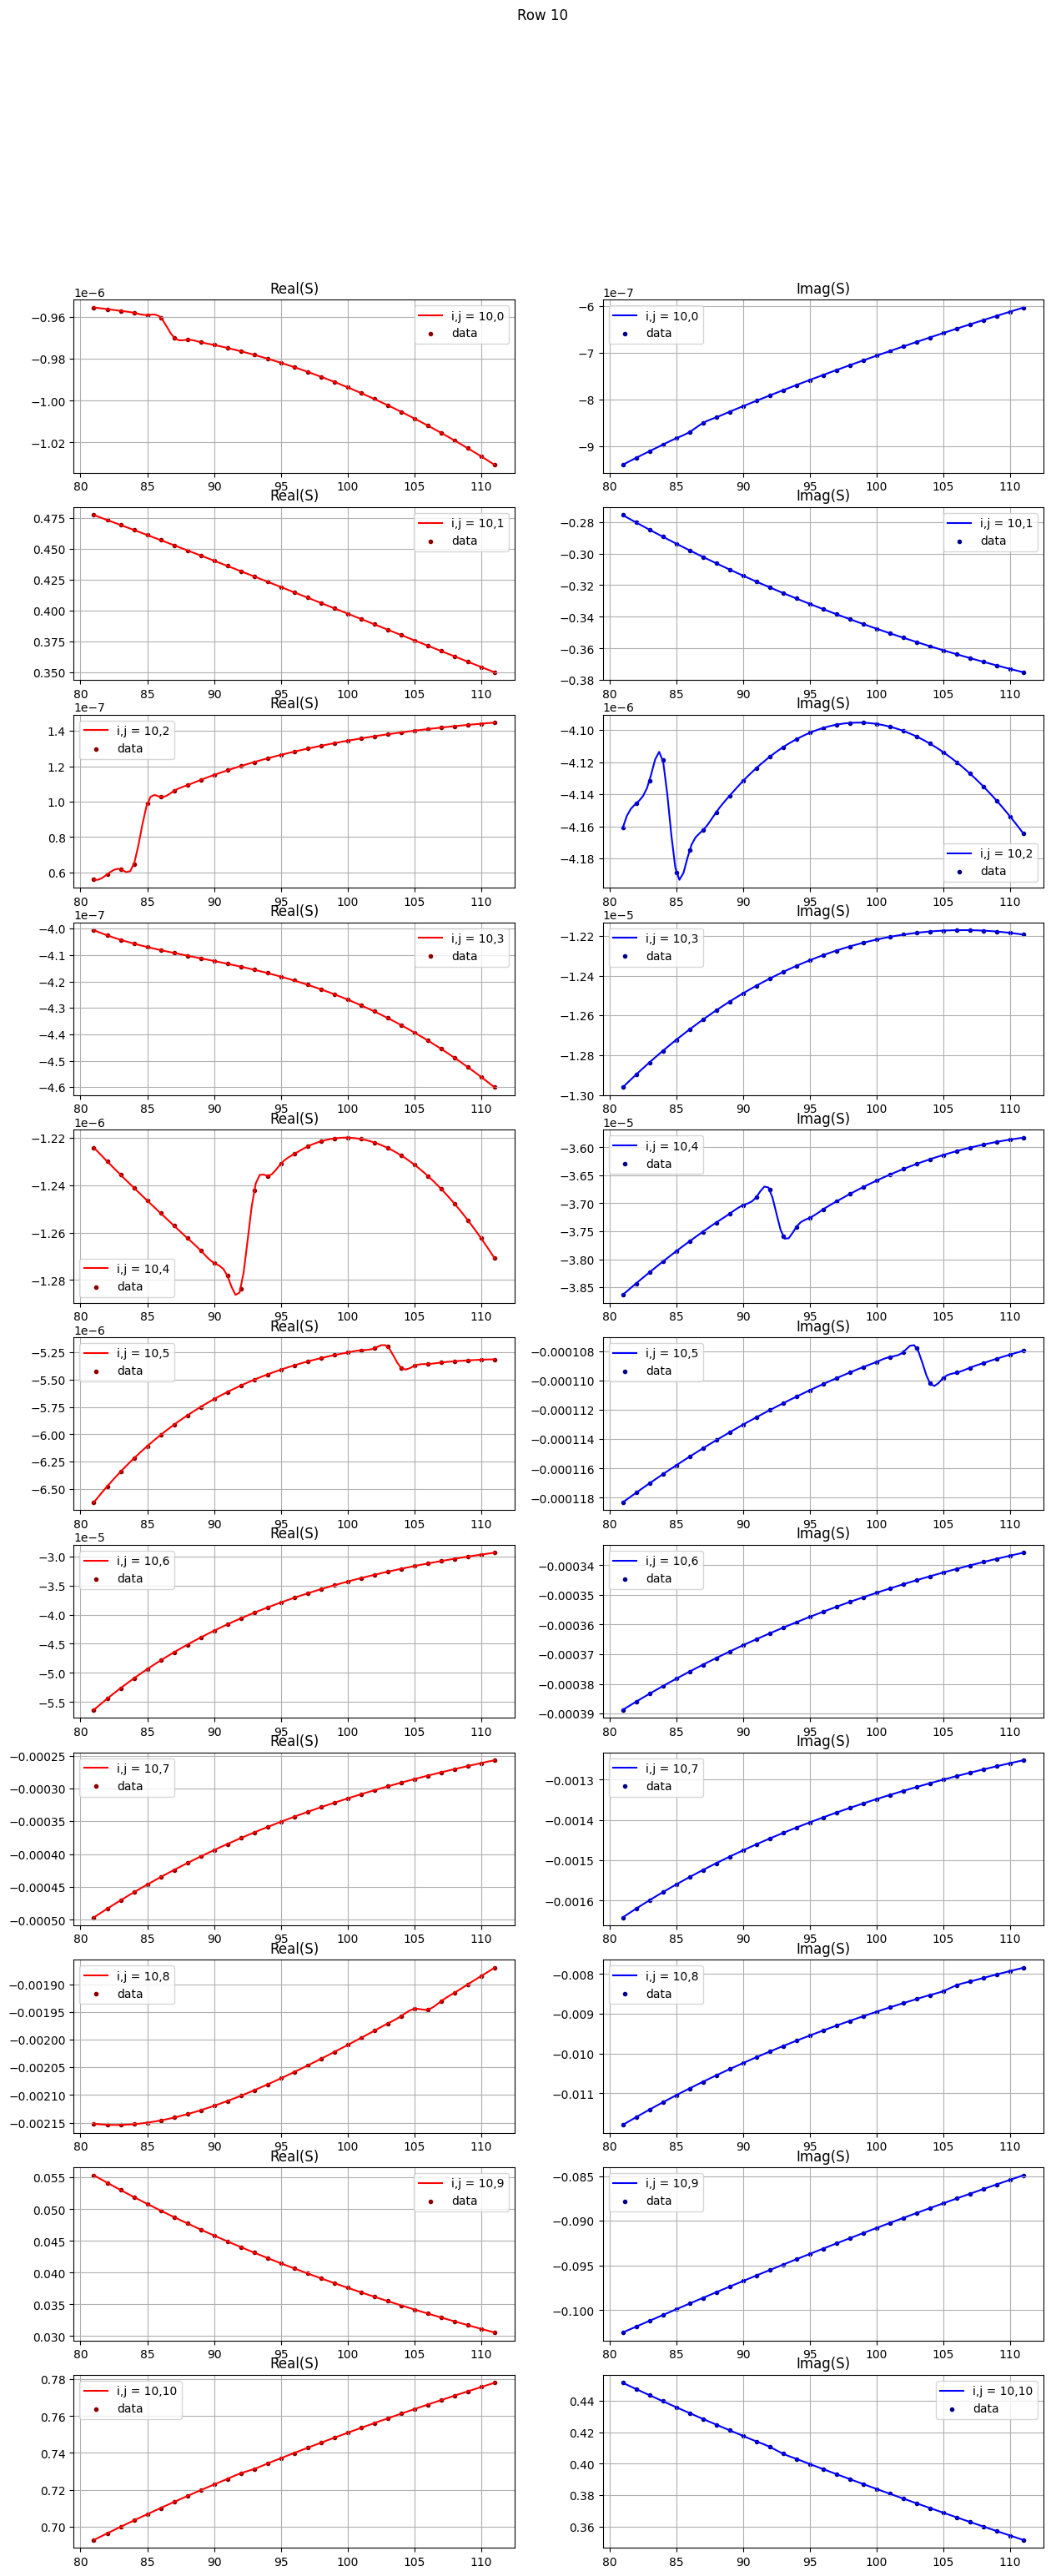

In [31]:
fs = np.linspace(81, 111, 100)
i = 10

fig, ax = plt.subplots(11,2, figsize=(15,35))
plt.suptitle(f'Row {i}')
for j in range(myrfTWA.num_straps + 2):
    Sij_array = myrfTWA.interp_matrix_real[i][j](fs) + 1j*myrfTWA.interp_matrix_imag[i][j](fs)

    

    ax[j,0].plot(fs, np.real(Sij_array), label=f'i,j = {i},{j}', color='red')
    ax[j,1].plot(fs, np.imag(Sij_array), label=f'i,j = {i},{j}', color='blue')


    ax[j,0].grid()
    ax[j,1].grid()

    ax[j,0].set_title(f'Real(S)')
    ax[j,1].set_title(f'Imag(S)')


    # raw data 
    freqs = myrfTWA.freqs_for_fullant
    smat_versus_freq = np.zeros((freqs.shape[0], myrfTWA.num_straps+2, myrfTWA.num_straps+2), dtype='complex') # the (nb_f, N, N) shaped s matrix
    for k in range(freqs.shape[0]):
        smat =  myrfTWA.get_ant_Smat_given_f_from_internal_datatable(freqs[k])
        smat_versus_freq[k, :, :] = smat

    Sij_data = smat_versus_freq[:,i,j]

    ax[j,0].scatter(freqs, np.real(Sij_data), marker='.', color='darkred', label=f'data')
    ax[j,1].scatter(freqs, np.imag(Sij_data), marker='.', color='darkblue', label=f'data')
    ax[j,0].legend()
    ax[j,1].legend()


In [32]:
##---------------------------------
# New area for testing withe the capacitiancies in LTSPice

# first, build a toolkit model and grab the S matrix at 96 MHz 

myTWA = TWA_Design_Toolkit(num_straps=num_straps, f0=f0, k_par_max=k_par)
myTWA.print_key_params()
myTWA.set_center_fed(True)
# set my antenna width to 50% of the distance between straps 
# myTWA.set_strap_width(w=10e-2) TODO: this has been updated 
myTWA.set_strap_width(w=8e-2)
print(f'Strap width: {myTWA.wstr*100} cm')

You are at resonance, so delta_phi = pi/2. Solving for d given k_par:


----------------Parameter--Box-------------------
Distance between strap centers d = 0.15625 m
The first null will be at 4.468042885105484 m^-1
delta_phi = -0.5 pi
Strap length should be less than lambda/4 = 0.7807095260416667 m
--------------END--Parameter--Box----------------


The antenna length is 1.33 m long
Strap width: 8.0 cm


In [33]:
# now gonig to try to build an ant network 
# Enter the physical parameters of the antenna 
num_straps = 9
f0 = 96e6
w0 = 2*np.pi*f0
clight = 3e8
Rant = 1.12 # m, hfs of d3d

# See code logbook "my antenna" section. This is for shot 147634. 
n_par = -5 
k_par = w0*n_par/clight
print(f'k_par : {k_par} 1/m')
n_phi = Rant*k_par
print(f'n_phi: {n_phi}')

# settings to create the rf toolkit object 
capz0 = 9.3506
antz0 = 30
freqs_for_fullant = np.array([96])# np.arange(81,112, 1)#  np.array([96, 97]) # MHz
capfile = 'circ_model/S11_cap_81to111MHz.csv'
antfile = 'circ_model/Smat_ant_96_deembed_full.csv' #'circ_model/fixed_Smat_ant_96_and_97_deembed.csv'

rfTWAobject2 = rftoolkit(num_straps=num_straps, f0=f0, k_par_max=k_par, capz0=capz0, 
                    antz0=antz0, freqs_for_fullant=freqs_for_fullant, capfile=capfile, antfile=antfile)

# add items to geometry
ar = 1.5e-2
d = 11e-2
s0 = 16e-2
wstrap = 8e-2
l = 15e-2
ts = 0.5e-2
tbox = 1e-2
h = .5e-2
t_cap_extend = 0.25e-2
wcap = wstrap + 2*t_cap_extend # 1 cm on either side
wcapbox = wcap + 2*h
tdiv = rfTWAobject2.geometry_dict['s_rez'] - 2*h - wcap 
dcap = ts + 2*t_cap_extend
dcapbox = dcap + 2*h
lcapbox = 10e-2
lcut = 6e-2
ldeembed = 5e-2
lfeed = 10e-2

rfTWAobject2.add_to_geometry('ar', ar)
rfTWAobject2.add_to_geometry('d', d)
rfTWAobject2.add_to_geometry('s0', s0)
rfTWAobject2.add_to_geometry('wstrap', wstrap)
rfTWAobject2.add_to_geometry('l', l)
rfTWAobject2.add_to_geometry('ts', ts)
rfTWAobject2.add_to_geometry('tbox', tbox)
rfTWAobject2.add_to_geometry('h', h)
rfTWAobject2.add_to_geometry('t_cap_extended', t_cap_extend)
rfTWAobject2.add_to_geometry('wcap', wcap)
rfTWAobject2.add_to_geometry('wcapbox', wcapbox)
rfTWAobject2.add_to_geometry('tdiv', tdiv)
rfTWAobject2.add_to_geometry('dcap', dcap)
rfTWAobject2.add_to_geometry('dcapbox', dcapbox)
rfTWAobject2.add_to_geometry('lcapbox', lcapbox)
rfTWAobject2.add_to_geometry('lcut', lcut)
rfTWAobject2.add_to_geometry('ldeembed', ldeembed)
rfTWAobject2.add_to_geometry('lfeed', lfeed)

rfTWAobject2.print_geometry()

k_par : -10.053096491487338 1/m
n_phi: -11.25946807046582
num_straps:     9
s_rez:          0.15625
lamda0:         3.1228381041666666
ar:             0.015
d:              0.11
s0:             0.16
wstrap:         0.08
l:              0.15
ts:             0.005
tbox:           0.01
h:              0.005
t_cap_extended: 0.0025
wcap:           0.085
wcapbox:        0.095
tdiv:           0.061249999999999985
dcap:           0.01
dcapbox:        0.02
lcapbox:        0.1
lcut:           0.06
ldeembed:       0.05
lfeed:          0.1


c:\Users\jacob\anaconda3\envs\waves\Lib\site-packages\scipy\interpolate\_fitpack_impl.py:975: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
	kx,ky=3,3 nx,ny=35,81 m=2356 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
c:\Users\jacob\anaconda3\envs\waves\Lib\site-packages\scipy\interpolate\_fitpack_impl.py:975: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
	kx,ky=3,3 nx,ny=34,81 m=2356 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


55.275876588781934
L:9.163988534210644e-08


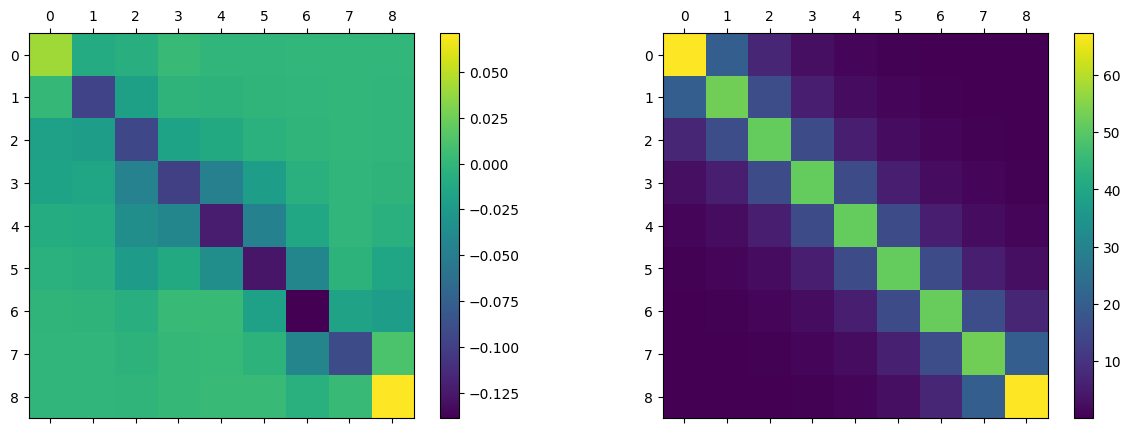

In [34]:
antnet_new=rfTWAobject2.build_antnet_chopped_from_internal_datatable(freqs=freqs_for_fullant, name=None)
zant = antnet_new.z[0, :, :]
fig, ax = plt.subplots(1,2, figsize=(15,5))
s1 = ax[0].matshow(np.real(zant[2:,2:]))
plt.colorbar(s1, ax=ax[0])
s2 = ax[1].matshow(np.imag(zant[2:,2:]))
plt.colorbar(s2, ax=ax[1])

Zim_av = np.trace(np.imag(zant[2:,2:]))/num_straps
print(Zim_av)
L = Zim_av/(2*np.pi*96e6)
print(f'L:{L}')

In [35]:
# Get capacitor values 
print(res.x)
cap1 =  myrfTWA.build_capnet_given_length_interpolated(length=res.x[0], freqs=np.array([96]))
cap2 =  myrfTWA.build_capnet_given_length_interpolated(length=res.x[1], freqs=np.array([96]))
cap3 =  myrfTWA.build_capnet_given_length_interpolated(length=res.x[2], freqs=np.array([96]))
cap4 =  myrfTWA.build_capnet_given_length_interpolated(length=res.x[3], freqs=np.array([96]))
cap5 =  myrfTWA.build_capnet_given_length_interpolated(length=res.x[4], freqs=np.array([96]))

zcap, C1 = myrfTWA.print_znorm_and_capacitance(cap1, 96, toprint=True)
zcap, C2 = myrfTWA.print_znorm_and_capacitance(cap2, 96, toprint=True)
zcap, C3 = myrfTWA.print_znorm_and_capacitance(cap3, 96, toprint=True)
zcap, C4 = myrfTWA.print_znorm_and_capacitance(cap4, 96, toprint=True)
zcap, C5 = myrfTWA.print_znorm_and_capacitance(cap5, 96, toprint=True)

Cav = (2*(C1 + C2+C3+C4) + C5)/num_straps
print(Cav)

w_av = 1/np.sqrt(L*Cav)
print(w_av/(2*np.pi*1e6))


[0.09466964 0.07421574 0.04619689 0.03503107 0.07014546]
Zcap:(0.00014568894699445995-50.13239024281682j), z0: [9.3506+0.j], Zcap/z0: [1.55807057e-05-5.36140892j]
C = 33.06971765181538 pF
Zcap:(0.0011252130601020769-66.60858065120851j), z0: [9.3506+0.j], Zcap/z0: [0.00012034-7.12345525j]
C = 24.889645963511416 pF
Zcap:(-0.0015982149618600325-112.33967892776633j), z0: [9.3506+0.j], Zcap/z0: [-0.00017092-12.01416796j]
C = 14.757599508599023 pF
Zcap:(-0.0008210534195347933-154.25576396523203j), z0: [9.3506+0.j], Zcap/z0: [-8.78075652e-05-16.49688405j]
C = 10.747501084719564 pF
Zcap:(0.00015528033663299306-70.81693913373647j), z0: [9.3506+0.j], Zcap/z0: [1.6606457e-05-7.57351818j]
C = 23.410557005432434 pF
2.114883171363591e-11
114.32327900965855


In [36]:
# calculating new seperation distance 

n_op = 1.8079
f = 96e6
w = 2*np.pi*f
clight = 3e8
dold = 0.15625
dphi_new = n_op*(w*dold)/clight
print(dphi_new)
print(dphi_new*180/np.pi)
npar_target = 5
d_new = dphi_new*clight/(npar_target*w)
print(d_new)

szpp = 10.25e-2
npar_pp = dphi_new*clight/(szpp*w)
kpp = dphi_new/szpp
print(npar_pp)
print(kpp)


0.5679685358424987
32.5422
0.05649687500000001
2.75594512195122
5.541156447243891


In [74]:
# optimize with a capacitor C object instead of lengths and see if they match up 
lmin = 0.02
lmax = 0.091#0.095
fi = 111
capmin = myrfTWA.build_capnet_given_length_from_internal_datatable(length=lmin, freqs=np.array([fi]))
zcapmin, Cmin = myrfTWA.print_znorm_and_capacitance(capmin, fi, toprint=True)
capmax = myrfTWA.build_capnet_given_length_from_internal_datatable(length=lmax, freqs=np.array([fi]))
zcapmax, Cmax = myrfTWA.print_znorm_and_capacitance(capmax, fi, toprint=True)

Zcap:(-0.0032559604606354005-267.2160937633782j), z0: [9.3506+0.j], Zcap/z0: [-0.00034821-28.57742752j]
C = 5.365800749309908 pF
Zcap:(0.00044319449331570214-45.79861317508962j), z0: [9.3506+0.j], Zcap/z0: [4.7397439e-05-4.89793309j]
C = 31.30724309624023 pF


In [64]:


# confirm class version works 
initial_guess = [20.532e-12]*5
bounds = [(5.3656e-12, 33.4e-12)]*5#[(0.02, 0.095)]*5
freq_bounds = (93, 98)
s11cutoff = -35
method = "Nelder-Mead"
xatol = 1e-5
fatol = 1e-5
maxiter = 2000
options = {"disp": True, "xatol": xatol, "fatol":fatol, "maxiter":maxiter}

res = myrfTWA.run_optimization_explicitC(initial_guess=initial_guess, 
                         cap_bounds=bounds,
                         S11_db_cutouff=s11cutoff,
                         freq_bounds=freq_bounds, 
                         method=method,
                         options=options,
                         symetric_mode=True,
                         one_cap_type_mode=False)

----------------------------------------
i_iter = 1
New simulation.
Point is: [2.0532e-11 2.0532e-11 2.0532e-11 2.0532e-11 2.0532e-11]
Average absolute error is : 5.36e+03
----------------------------------------
i_iter = 2
New simulation.
Point is: [2.15586e-11 2.05320e-11 2.05320e-11 2.05320e-11 2.05320e-11]
Average absolute error is : 5.24e+03
----------------------------------------
i_iter = 3
New simulation.
Point is: [2.05320e-11 2.15586e-11 2.05320e-11 2.05320e-11 2.05320e-11]
Average absolute error is : 5.74e+03
----------------------------------------
i_iter = 4
New simulation.
Point is: [2.05320e-11 2.05320e-11 2.15586e-11 2.05320e-11 2.05320e-11]
Average absolute error is : 5.86e+03
----------------------------------------
i_iter = 5
New simulation.
Point is: [2.05320e-11 2.05320e-11 2.05320e-11 2.15586e-11 2.05320e-11]
Average absolute error is : 5.78e+03
----------------------------------------
i_iter = 6
New simulation.
Point is: [2.05320e-11 2.05320e-11 2.05320e-11 2.053

In [65]:
print(res.x*1e12)

[33.4        27.38748479 11.45394761 30.88599326 31.44034437]


final Cs: [3.3399999999999996e-11, 2.738748479120796e-11, 1.1453947614784943e-11, 3.0885993255768436e-11, 3.144034437204356e-11]


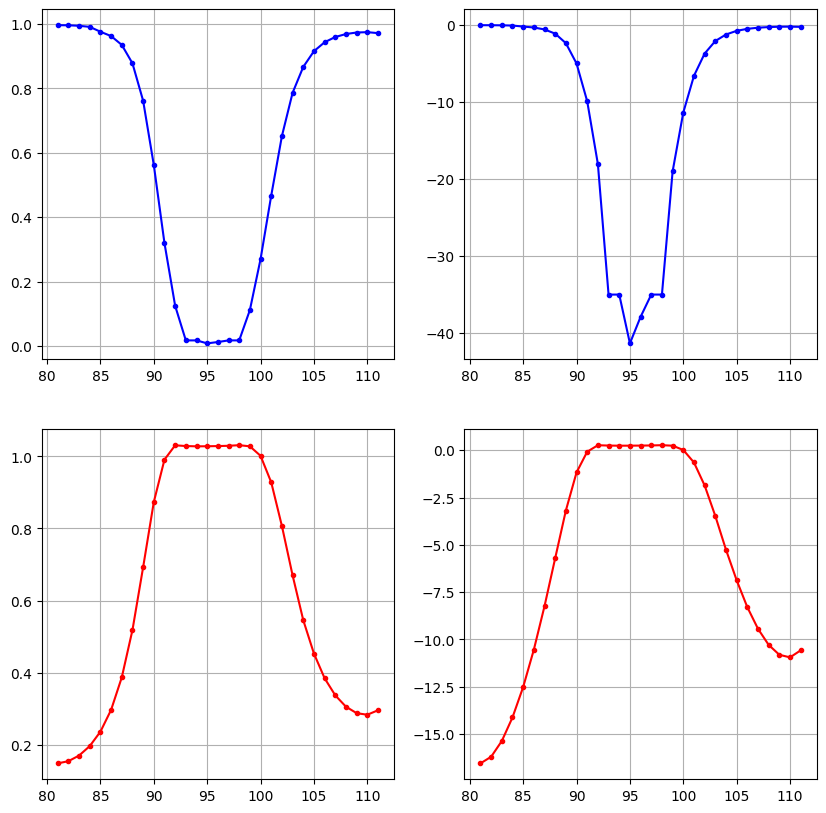

In [67]:
Cs_found = res.x.tolist()
print('final Cs:',Cs_found)
full_net_optimized = myrfTWA.get_fullant_given_Cs_via_caps_from_internal_datatable(Cs_found, symetric_mode=True) #TODO: make true

S11_array = np.zeros_like(myrfTWA.freqs_for_fullant, dtype='complex')
S21_array = np.zeros_like(myrfTWA.freqs_for_fullant, dtype='complex')

for i in range(S11_array.shape[0]):
    S11, S21 = myrfTWA.get_full_TWA_network_S11_S21(fullnet=full_net_optimized, f=myrfTWA.freqs_for_fullant[i])
    S11_array[i] = S11
    S21_array[i] = S21

S11_mag_array = np.zeros_like(S11_array)
S11_db_array = np.zeros_like(S11_array)

S21_mag_array = np.zeros_like(S11_array)
S21_db_array = np.zeros_like(S11_array)


for i in range(S11_array.shape[0]):
    S11_mag_array[i] = np.abs(S11_array[i])
    S11_db_array[i] = 20*np.log10(S11_mag_array[i])
    S21_mag_array[i] = np.abs(S21_array[i])
    S21_db_array[i] = 20*np.log10(S21_mag_array[i])

fig, ax = plt.subplots(2,2,figsize=(10,10))

ax[0,0].plot(myrfTWA.freqs_for_fullant, S11_mag_array, marker='.', color='blue')
ax[0,1].plot(myrfTWA.freqs_for_fullant, S11_db_array, marker='.', color='blue')
ax[0,0].grid()
ax[0,1].grid()
ax[1,0].plot(myrfTWA.freqs_for_fullant, S21_mag_array, marker='.', color='red')
ax[1,1].plot(myrfTWA.freqs_for_fullant, S21_db_array, marker='.', color='red')
ax[1,0].grid()
ax[1,1].grid()
